https://www.youtube.com/watch?v=8yZMXCaFshs

https://www.kaggle.com/competitions/titanic/rules


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import scikit learn models

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


explore the data and figure out what model is best

first thoughts are that ticket, name, embarked etc. are not useful

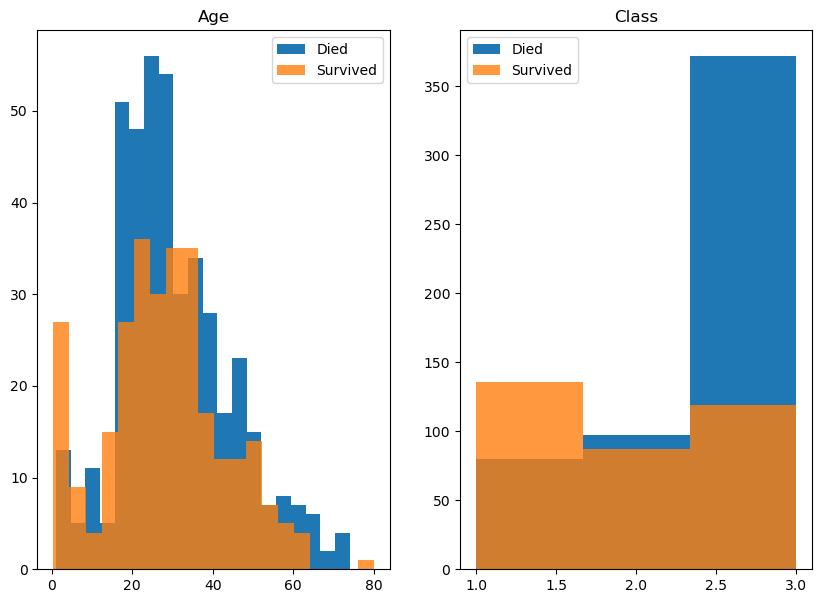

In [3]:
fig, ax = plt.subplots(figsize =(10, 7), nrows=1, ncols=2)
ax[0].hist(train.loc[train['Survived'] == 0, 'Age'], bins=20)
ax[0].hist(train.loc[train['Survived'] == 1, 'Age'], alpha=0.8, bins=20)
ax[0].legend(['Died', 'Survived'])
ax[0].set_title('Age')

ax[1].hist(train.loc[train['Survived'] == 0, 'Pclass'], bins=3)
ax[1].hist(train.loc[train['Survived'] == 1, 'Pclass'], alpha=0.8, bins=3)
ax[1].legend(['Died', 'Survived'])
ax[1].set_title('Class')

plt.show()

In [4]:
n_males = len(train.loc[train['Sex'] == 'male'].index)
n_females = len(train.loc[train['Sex'] == 'female'].index)
# define kids as younger than 10
age = 10
n_kids = len(train.loc[train['Age'] < age].index)

n_surviving_males = len(train.loc[(train['Survived'] == 1) & (train['Sex'] == 'male')].index)
n_surviving_females = len(train.loc[(train['Survived'] == 1) & (train['Sex'] == 'female')].index)
n_surviving_kids = len(train.loc[(train['Age'] < age) & (train['Survived'] == 1)].index)

pct_male = round(n_surviving_males*100/n_males, 4)
pct_female = round(n_surviving_females*100/n_females, 4)
pct_kids = round(n_surviving_kids*100/n_kids, 4)

print(f'{pct_male}% of males survived')
print(f'{pct_female}% of females survived')
print('\n')
print(f'{pct_kids}% of kids <{age}yrs survived')
print(f'{100-pct_kids}% of kids >{age}yrs survived')

18.8908% of males survived
74.2038% of females survived


61.2903% of kids <10yrs survived
38.7097% of kids >10yrs survived


it is clear that age and gender play a big role

lets try and make a model just off those two

In [5]:
from sklearn import tree
from sklearn.model_selection import train_test_split

In [6]:
clf = tree.DecisionTreeClassifier()

lets just get the data we want

In [7]:
train_ds = train[train['Age'].notna() & train['Sex'].notna() & train['Survived'].notna()]

X = train_ds[['Age']].copy()
X['Sex'] = (train_ds['Sex']=='male').astype(int)

y = train_ds[['Survived']].copy()

X.head(), y.head()

(    Age  Sex
 0  22.0    1
 1  38.0    0
 2  26.0    0
 3  35.0    0
 4  35.0    1,
    Survived
 0         0
 1         1
 2         1
 3         1
 4         0)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

clf = clf.fit(X_train, y_train)
#tree.plot_tree(clf)

/Users/jasperchong/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jasperchong/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/jasperchong/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/jasperchong/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed

In [10]:
clf.score(X_test, y_test)

/Users/jasperchong/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jasperchong/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/jasperchong/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


0.75

good enough!

now we prepare our final submission

In [167]:
test_ds = test[test['Age'].notna() & test['Sex'].notna()]

test_data = test_ds[['Age']].copy()
test_data['Sex'] = (test_ds['Sex']=='male').astype(int)

clf2 = tree.DecisionTreeClassifier()
clf2 = clf2.fit(X, y)

y_preds = clf2.predict(test_data)

/Users/jasperchong/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jasperchong/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/jasperchong/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/jasperchong/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed

In [222]:
# submission = pd.DataFrame(data = [test_ds.index, y_preds], index=test_ds.index)
submission = pd.DataFrame()
#submission['PassengerId'] = test_ds['PassengerId']
submission['Survived'] = y_preds
submission.index = test_ds['PassengerId']
submission = pd.DataFrame(submission['Survived'].reindex(range(892,len(test['PassengerId'])+892), fill_value= '0'))
submission.head()

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


In [223]:
submission.to_csv('gender_age_submission.csv')

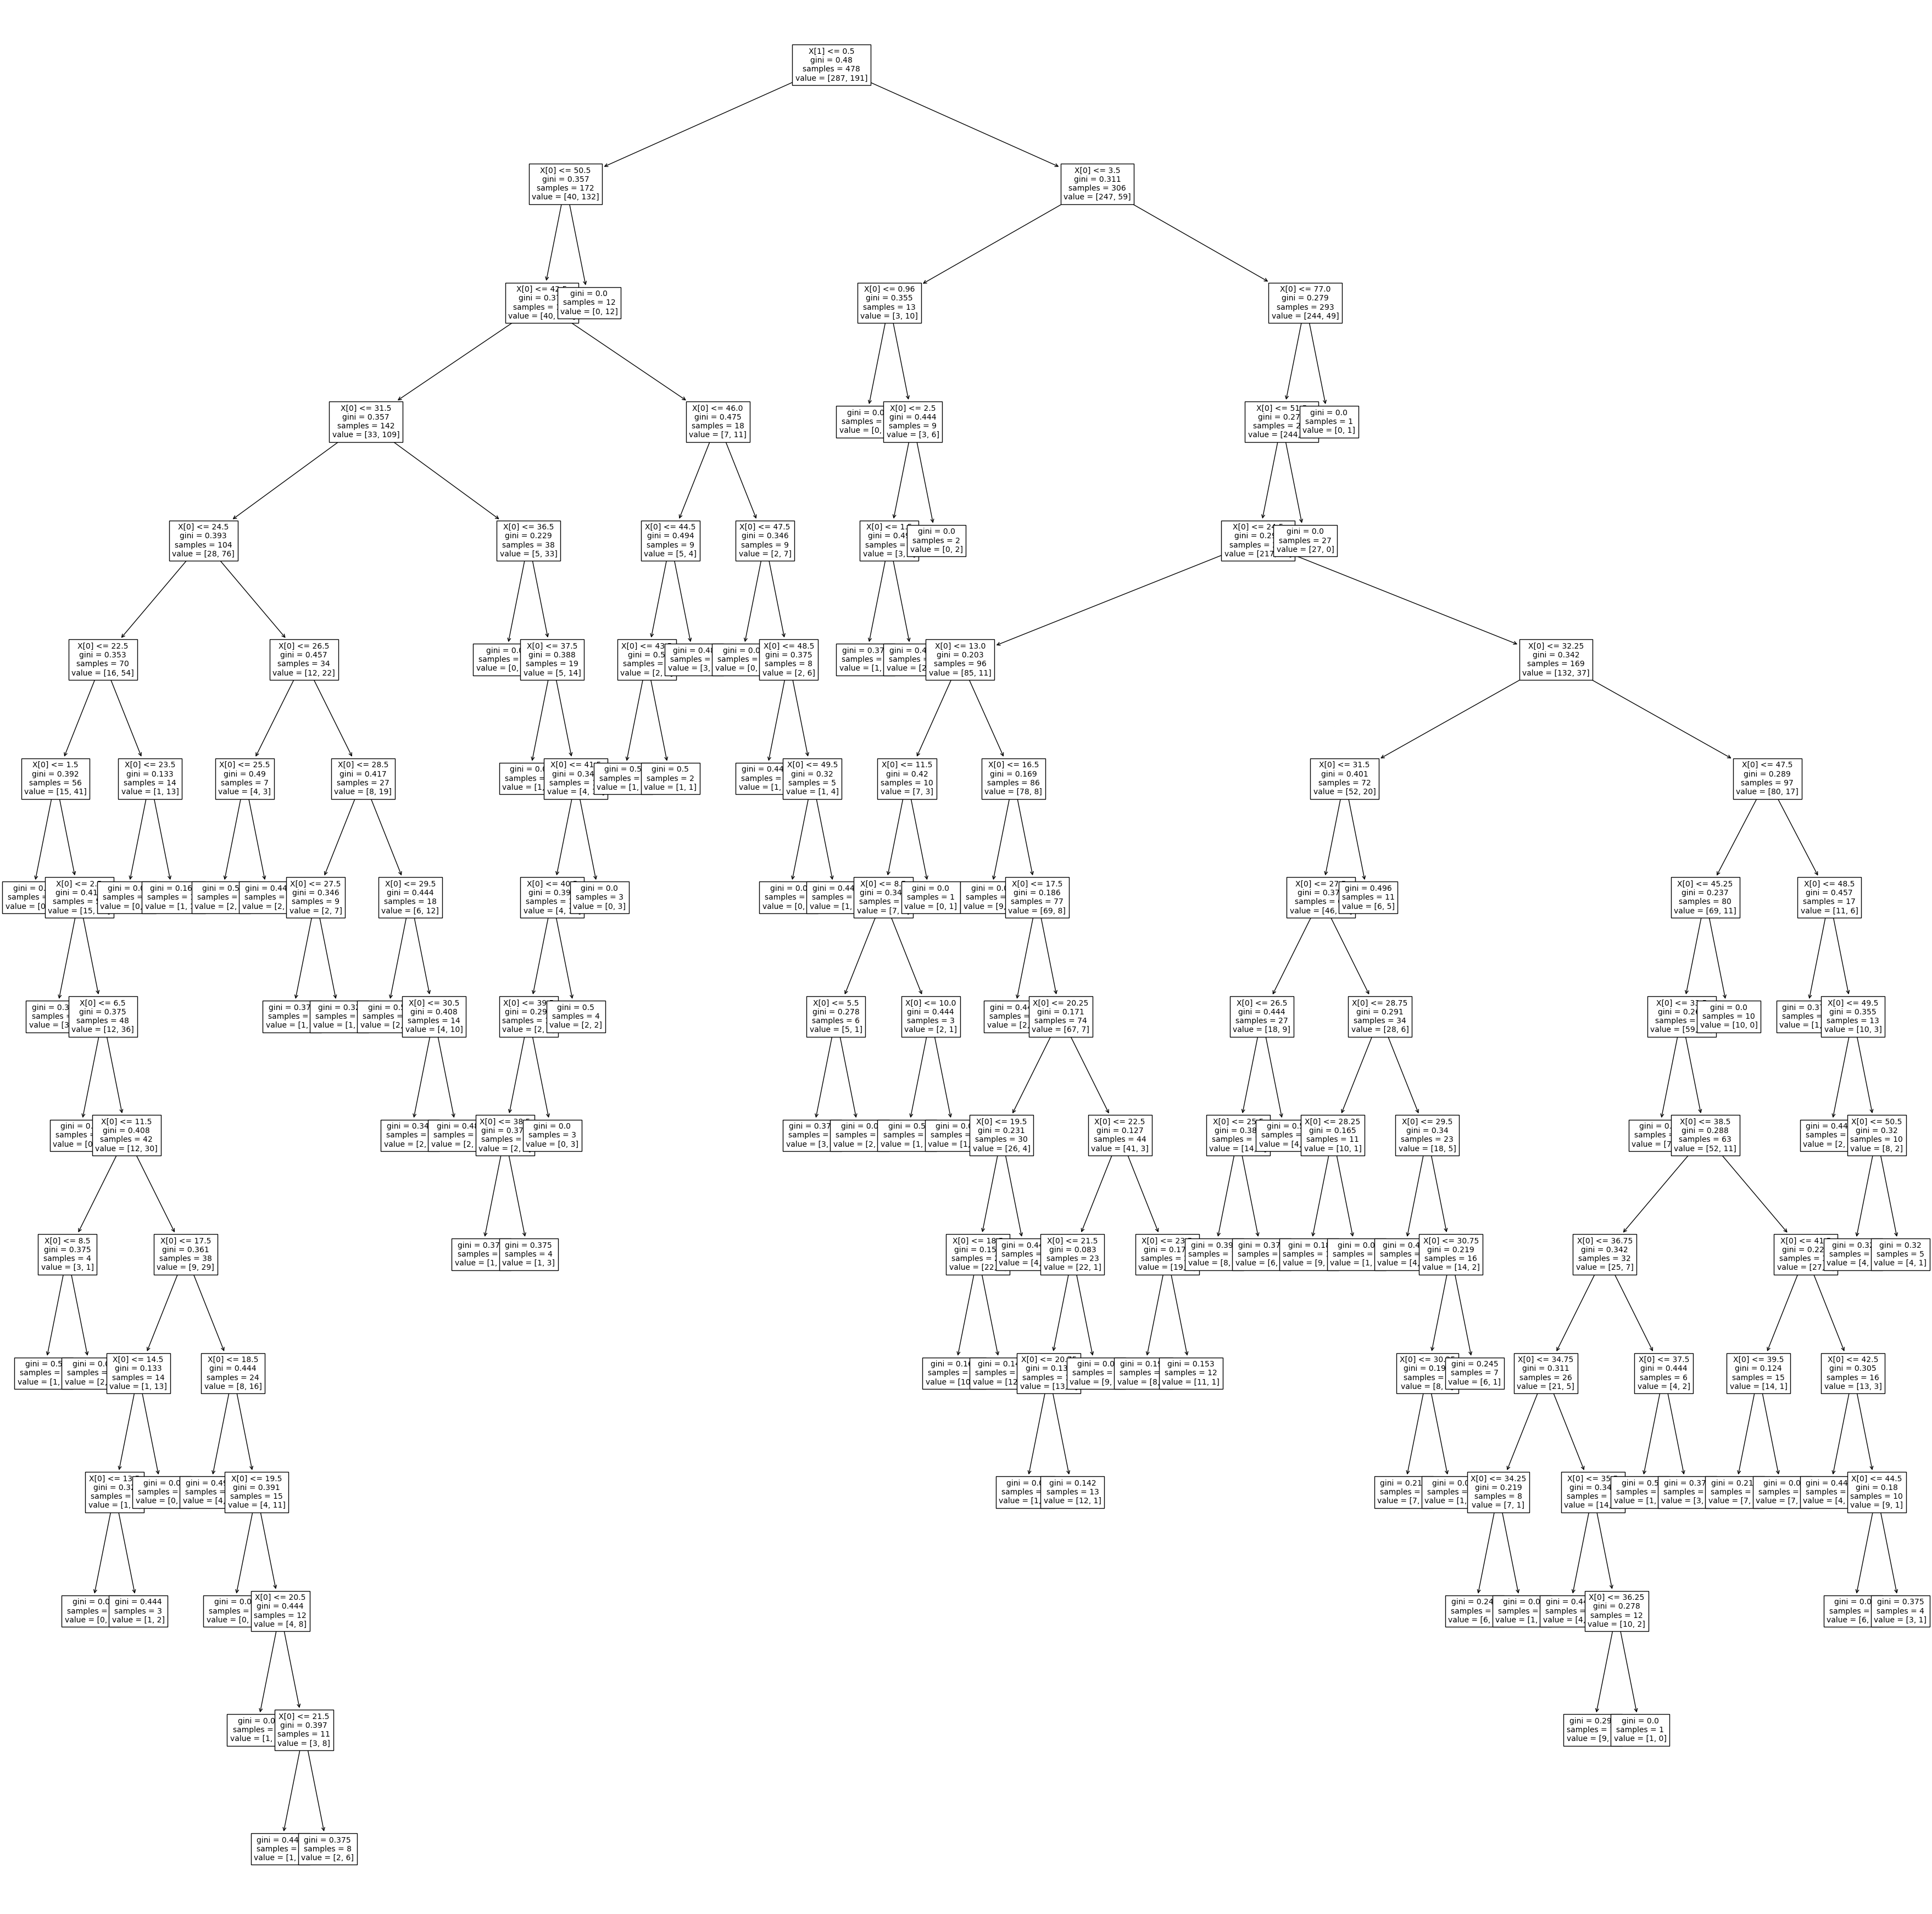

In [14]:
plt.figure(figsize=(45,45))  # set plot size (denoted in inches)
tree.plot_tree(clf, fontsize=10)
plt.show()

In [15]:
X

,Age,Sex
0,22.0,1
1,38.0,0
2,26.0,0
3,35.0,0
4,35.0,1
...,...,...
885,39.0,0
886,27.0,1
887,19.0,0
889,26.0,1
